In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA 
import itertools
import warnings
warnings.filterwarnings('ignore') #ignore warning messages 
%matplotlib inline

In [73]:
# Evaluating original dataset
df = pd.read_csv("creditcard.csv") # importing the dataset
df.info() # information about data type, missing values, count
df.describe() # statistical information about the features of the dataset
# Excluding values of Amount greaterth
df[df.Amount>10000]
df_new=df[df.Amount<10000]
df_new.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,...,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000
mean,94813.586235,0.000716,0.001123,0.000542,-0.000326,0.000800,-0.000436,-0.000897,0.000198,0.000045,...,-0.000100,0.000140,0.000326,-0.000027,0.000103,0.000019,-0.000073,0.000008,87.927043,0.001728
std,47488.019368,1.953489,1.635632,1.511555,1.414375,1.359939,1.324170,1.210706,1.193066,1.098578,...,0.732325,0.724703,0.618721,0.605586,0.520394,0.482084,0.399034,0.328549,235.414278,0.041528
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-8.887017,-44.807735,-2.836627,-10.295397,-2.068561,-22.565679,-11.710896,0.000000,0.000000
25%,54202.500000,-0.920290,-0.598457,-0.890240,-0.848660,-0.691546,-0.768299,-0.554089,-0.208605,-0.643083,...,-0.228395,-0.542320,-0.161841,-0.354593,-0.317128,-0.326979,-0.070835,-0.052960,5.590000,0.000000
50%,84691.000000,0.018158,0.065524,0.179859,-0.019921,-0.054322,-0.274227,0.040079,0.022363,-0.051416,...,-0.029452,0.006795,-0.011191,0.040964,0.016607,-0.052124,0.001343,0.011243,22.000000,0.000000
75%,139320.000000,1.315648,0.803743,1.027212,0.743302,0.611927,0.398463,0.570385,0.327356,0.597164,...,0.186367,0.528554,0.147642,0.439524,0.350716,0.240952,0.091045,0.078277,77.150000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.491217,34.801666,22.529298,36.877368,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,8790.260000,1.000000


In [74]:
# Converting time into time frame of seconds
timedelta = pd.to_timedelta(df_new['Time'], unit='s')
df_new['Time_min'] = (timedelta.dt.components.minutes).astype(int) #new variable for further analysis
df_new['Time_hour'] = (timedelta.dt.components.hours).astype(int)  #new variable for further analysis

In [75]:
# Segregating the data into the fraudulent and n0n-fraudulent transactions
df_fraud = df_new[df_new.Class == 1]
df_normal = df_new[df_new.Class == 0]

print("Fraud transaction statistics")
print(df_fraud["Amount"].describe())
print("\nNormal transaction statistics")
print(df_normal["Amount"].describe())

Fraud transaction statistics
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal transaction statistics
count    284307.000000
mean         87.867714
std         235.371970
min           0.000000
25%           5.650000
50%          22.000000
75%          77.040000
max        8790.260000
Name: Amount, dtype: float64


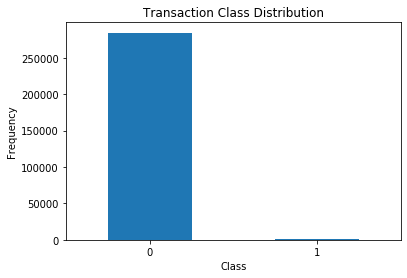

In [86]:
#Plotting graph to show the imbalances in data spread with regards to the class; normal or fraudulent transaction
count_classes = pd.value_counts(df_new['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency");

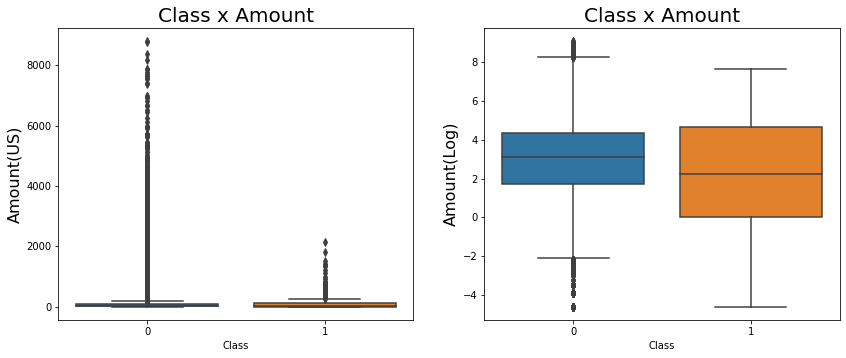

In [76]:
#Feature engineering to envision a better visualization of the values
df_new['Amount_log'] = np.log(df_new.Amount + 0.01) #logaritmic transformation due to skewness of fraud transaction distributon
plt.figure(figsize=(14,6))

#distribution of amount by time variable:
plt.subplot(121)
ax = sns.boxplot(x ="Class",y="Amount", data=df_new)
ax.set_title("Class x Amount", fontsize=20)
ax.set_ylabel("Amount(US)", fontsize = 16)

plt.subplot(122)
ax1 = sns.boxplot(x ="Class",y="Amount_log", data=df_new)
ax1.set_title("Class x Amount", fontsize=20)
ax1.set_ylabel("Amount(Log)", fontsize = 16)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

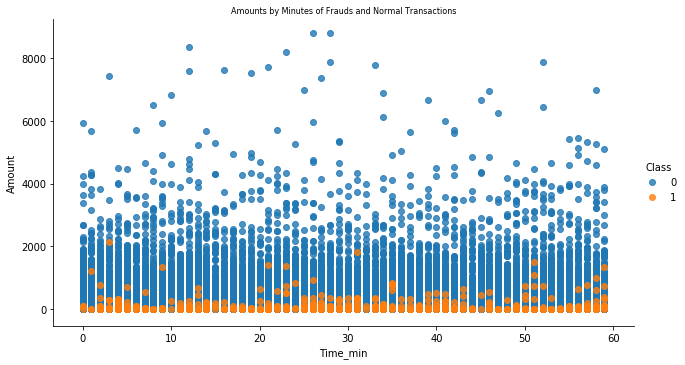

In [44]:
#Plotting the distribuition of Fruadulent and normal transactions per unit time in minutes
ax = sns.lmplot(y="Amount", x="Time_min", fit_reg=False,aspect=1.8, data=df_new, hue='Class')
plt.title("Amounts by Minutes of Frauds and Normal Transactions",fontsize=8)
plt.show()

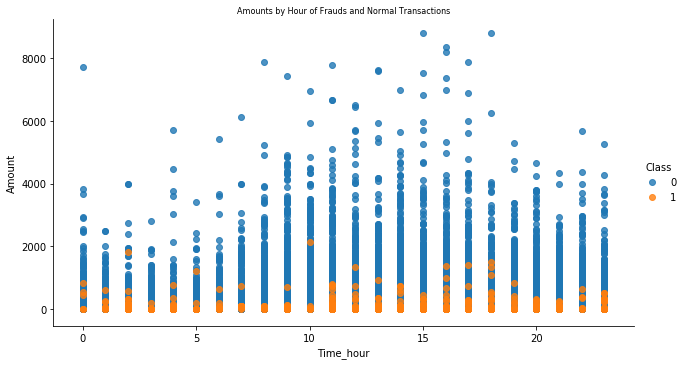

In [45]:
#Plotting the distribuition of Fruadulent and normal transactions per unit time in hour
ax = sns.lmplot(y="Amount", x="Time_hour", fit_reg=False,aspect=1.8, data=df_new, hue='Class')
plt.title("Amounts by Hour of Frauds and Normal Transactions", fontsize=8)
plt.show()

In [46]:
df_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,Time_min,Time_hour,Amount_log
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0,5.008166
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0,0.993252
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,0,5.936665
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0,4.816322
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0,4.248495


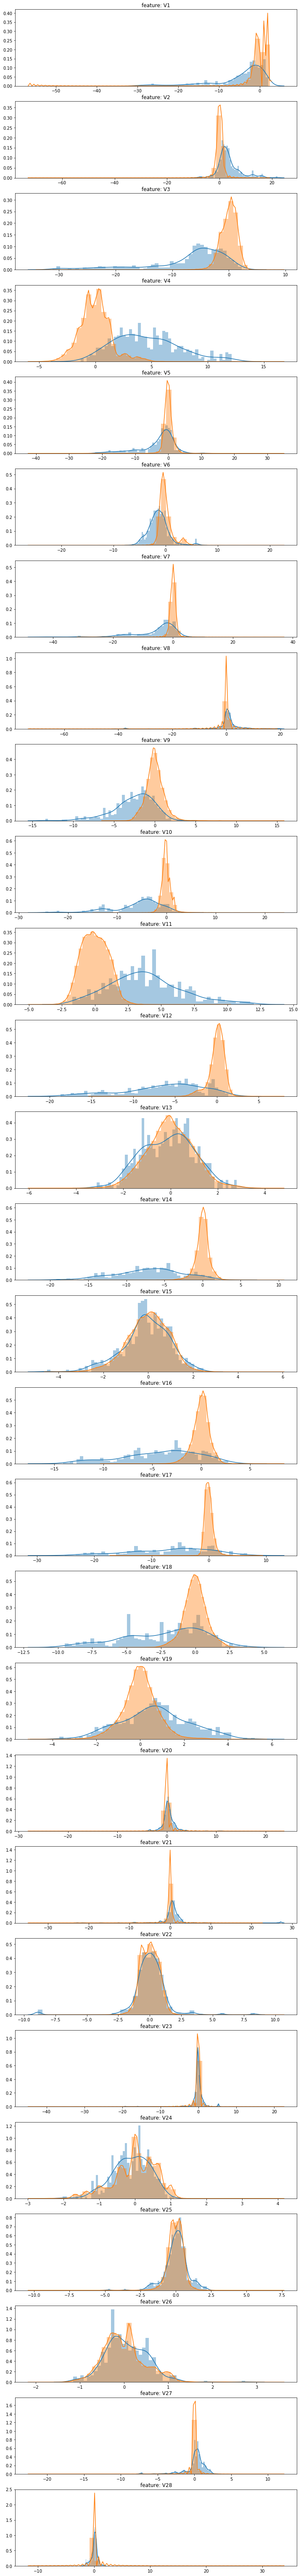

In [47]:
# distribution of each classes for syntethic variables between V1-V28
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df_new[df_new.iloc[:, 1:29].columns]):
   ax = plt.subplot(gs[i])
   sns.distplot(df_new[cn][df_new.Class == 1], bins=50)
   sns.distplot(df_new[cn][df_new.Class == 0], bins=50)
   ax.set_xlabel('')
   ax.set_title('feature: ' + str(cn))
plt.show()

In [48]:
df_new = df_new.drop(['Time_min','Time_hour','Amount'], axis=1)

In [49]:
df_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_log
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.008166
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.993252
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.936665
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.816322
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.248495


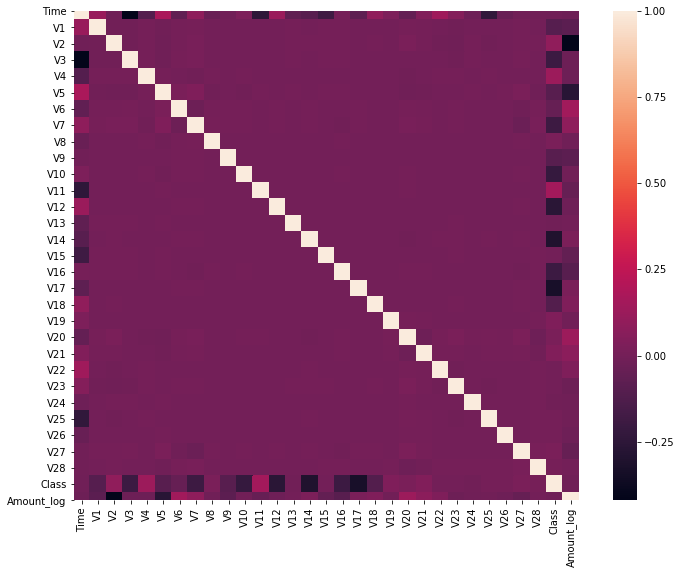

In [50]:
#Corelation matrix on the relationship for whole data
correlation_matrix = df_new.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=1,square = True)
plt.show()

[[56858    20]
 [   24    58]]


Text(0.5, 257.44, 'Predicted label')

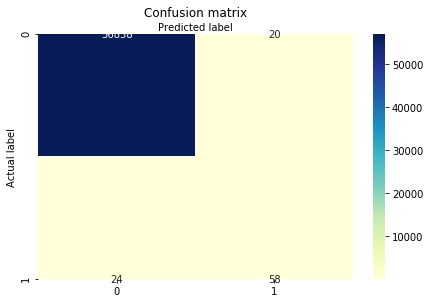

In [90]:
#LogisticRegression using the imbalanced data

X = df_new.drop('Class', axis=1)
y = df_new.Class

##training size 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_test)
y_score = logistic_reg.decision_function(X_test)

# Confusion matrix & metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print (cm)
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



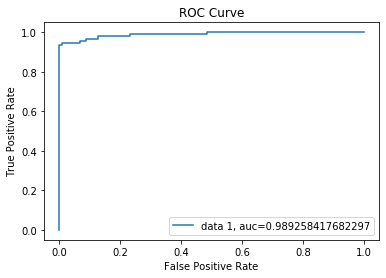

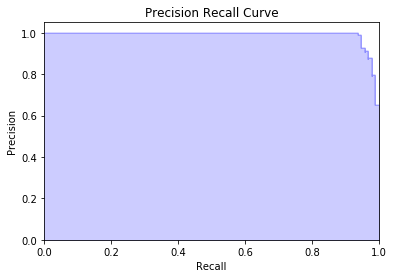

In [70]:
# Plotting the AUC score of the logistic regression model with the imbalance data
fpr, tpr, _ = metrics.roc_curve(y_test,  y_score)
auc = metrics.roc_auc_score(y_test, y_score)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()


# Plotting the Precision Recall Curve
precision, recall, _ = metrics.precision_recall_curve(y_test, y_score)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision Recall Curve')
plt.show()

The number of transactions after resampling : 568614
If the number of frauds is equal to the number of normal tansactions?True
[[55989   722]
 [ 3580 53432]]
Accuracy: 0.9621712406461314
Precision: 0.9866676515123537
Recall: 0.937206202203045
F1-score: 0.9613011172480793


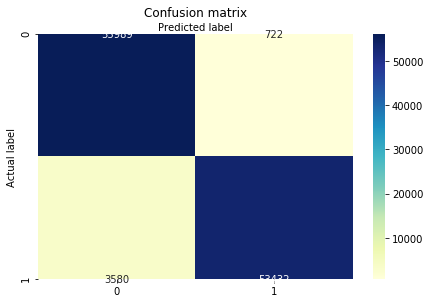

In [91]:
##LogisticRegression with Three Sampling Method 
#Logistic Regression model with Synthetic Minority Oversampling Technique (SMOTE)
X = df_new.drop('Class', axis=1)
y = df_new.Class
X_resample, y_resample = SMOTE().fit_sample(X, y)  # Generating more samples of fraudulent transactions through SMOTE
print ( 'The number of transactions after resampling : ' + str(len(X_resample)))
print ('If the number of frauds is equal to the number of normal tansactions?'+ str(sum(y_resample == 0) == sum(y_resample == 1))) 

##training size 0.8
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=3)
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_test)
y_score = logistic_reg.decision_function(X_test)

# Confusion matrix & metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print (cm)
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Plotting the Accuracy, Precision, Recall
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1-score:",metrics.f1_score(y_test, y_pred))

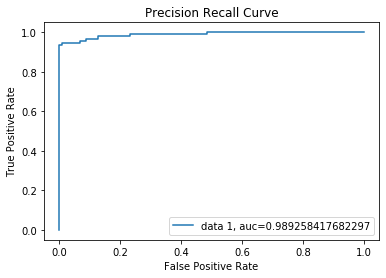

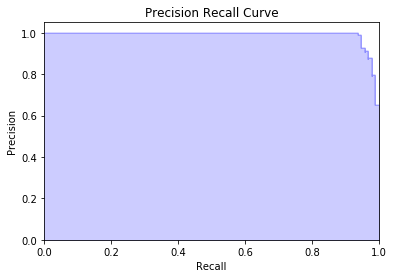

In [69]:
# Plotting the AUC score of the logistic regression model with the SMOTE resampled data
fpr, tpr, _ = metrics.roc_curve(y_test,  y_score)
auc = metrics.roc_auc_score(y_test, y_score)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()


# Plotting the Precision Recall Curve
precision, recall, _ = metrics.precision_recall_curve(y_test, y_score)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision Recall Curve')
plt.show()

The number of transactions after resampling : 568614
If the number of frauds is equal to the number of normal tansactions? True
[[55363  1348]
 [ 5468 51544]]
Accuracy: 0.9400648945244146
Precision: 0.9745141042123573
Recall: 0.9040903669402933
F1-score: 0.9379822390449848


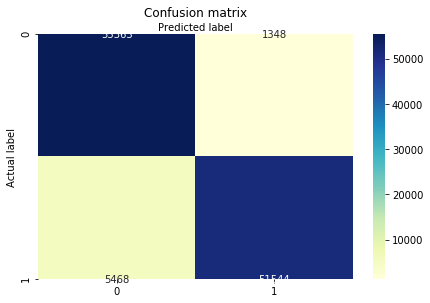

In [92]:
## LogisticRegression with Three Sampling Method 
#LogisticRegression with an Random naive oversampling technique
X = df_new.drop('Class', axis=1)
y = df_new.Class
X_resample, y_resample = RandomOverSampler().fit_sample(X, y)  #Generating more samples of fraudulent transactions 

print ( 'The number of transactions after resampling : ' + str(len(X_resample)))
print ('If the number of frauds is equal to the number of normal tansactions? ' + str(sum(y_resample == 0) == sum(y_resample == 1)))

#training size 0.8
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=3)
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_test)
y_score = logistic_reg.decision_function(X_test)


# Confusion matrix & metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print (cm)
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Plotting the Accuracy, Precision, Recall
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1-score:",metrics.f1_score(y_test, y_pred))

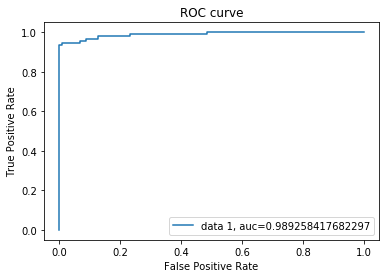

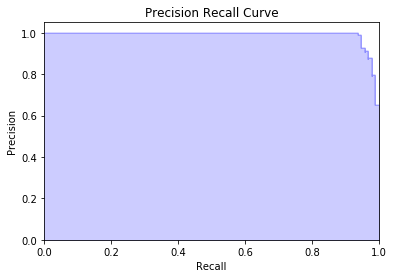

In [67]:
# Plotting the AUC score of the logistic regression model with the random naive oversampled data
fpr, tpr, _ = metrics.roc_curve(y_test,  y_score)
auc = metrics.roc_auc_score(y_test, y_score)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve')
plt.legend(loc=4)
plt.show()

# Plotting the Precision Recall Curve
precision, recall, _ = metrics.precision_recall_curve(y_test, y_score)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision Recall Curve')
plt.show()

The number of transactions after resampling : 984
If the number of frauds is equal to the number of normal tansactions? True
[[102   1]
 [  6  88]]
Accuracy: 0.9644670050761421
Precision: 0.9887640449438202
Recall: 0.9361702127659575
F1-score: 0.9617486338797814


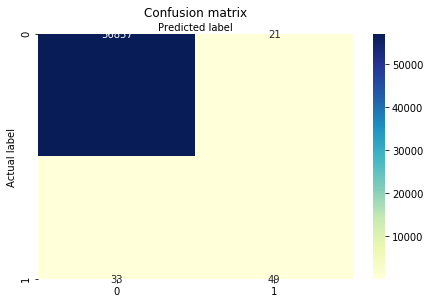

In [56]:
#LogisticRegression with the Undersampling technique
X = df_new.drop('Class', axis=1)
y = df_new.Class
X_resample, y_resample = RandomUnderSampler().fit_sample(X, y)  ## Random Oversampler(), SMOTE; Random Undersampler
print ( 'The number of transactions after resampling : ' + str(len(X_resample)))
print ('If the number of frauds is equal to the number of normal tansactions? ' + str(sum(y_resample == 0) == sum(y_resample == 1)))

#training size 0.8
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=3)

logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_test)
y_score = logistic_reg.decision_function(X_test)


# Confusion matrix & metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print (cm)
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Plotting the Accuracy, Precision, Recall
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1-score:",metrics.f1_score(y_test, y_pred))

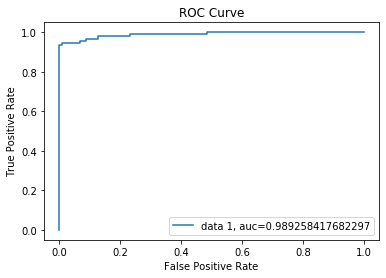

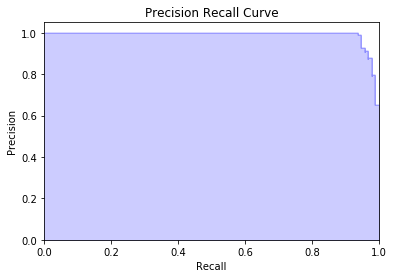

In [68]:
# Plotting the AUC score of the logistic regression model with the random naive undersampled dataset  
fpr, tpr, _ = metrics.roc_curve(y_test,  y_score)
auc = metrics.roc_auc_score(y_test, y_score)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()


# Plotting the Precision Recall Curve
precision, recall, _ = metrics.precision_recall_curve(y_test, y_score)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision Recall Curve')
plt.show()